In [3]:
!pip install -r /root/workspace/pytorch-pipeline-1/requirements.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [32]:
!python3 /root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py

Traceback (most recent call last):
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py", line 43, in <module>
    main()
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py", line 40, in main
    test_audio_preprocess_dataset_stft()
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py", line 18, in test_audio_preprocess_dataset_stft
    dataset = new_datasets.Audio_preprocess_dataset(config, annotation_df, audio_loader, 'cpu')
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/new_datasets.py", line 87, in __init__
    self.annotations = annotation_loader_with_indexes(config['annotations_dir'])
KeyError: 'annotations_dir'


In [33]:
!python3 /root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/new_datasets.py /root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/preprocessing-config.yml

Using device cuda
Traceback (most recent call last):
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/new_datasets.py", line 314, in <module>
    main()
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/new_datasets.py", line 311, in main
    dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/new_datasets.py", line 151, in preprocess_and_save
    for i, data in enumerate(dataloader):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 628, in __next__
    data = self._next_data()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 671, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "/opt/conda/lib/python3.7/site-packages/torch/ut

In [34]:
!python3 /root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py

Traceback (most recent call last):
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py", line 43, in <module>
    main()
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py", line 40, in main
    test_audio_preprocess_dataset_stft()
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/test-processing.py", line 18, in test_audio_preprocess_dataset_stft
    dataset = new_datasets.Audio_preprocess_dataset(config, annotation_df, audio_loader, 'cpu')
  File "/root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/new_datasets.py", line 87, in __init__
    self.annotations = annotation_loader_with_indexes(config['annotations_dir'])
KeyError: 'annotations_dir'


### Test STFT

In [ ]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

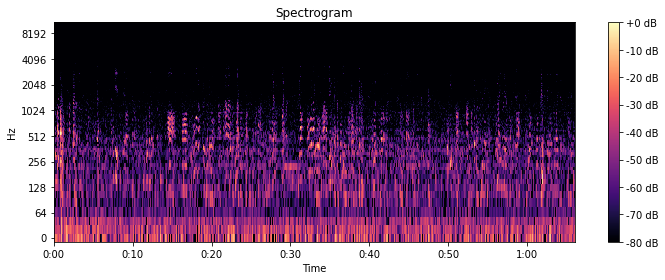

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import torch
import os 
import torchaudio

tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S[0], ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

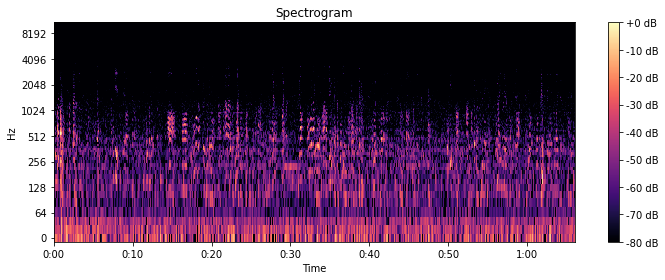

In [36]:

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

# torch_tensor = torch.from_numpy(audio)

# Compute the spectrogram
S2 = torchaudio.transforms.Spectrogram(n_fft = 1024, hop_length = 512, window_fn=torch.hann_window)(audio)
S2 = S2.cpu().numpy()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S2[0], ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [37]:
np.linalg.norm(S2-S)

0.0

### Test Power Spectrogram

In [51]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [52]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'PowerSpectrogram','n_fft': 1024,'hop_length': 512,'window': 'hann'}]}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [53]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [58]:
audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

# torch_tensor = torch.from_numpy(audio)

# Compute the spectrogram
S2 = torchaudio.transforms.Spectrogram(n_fft = 1024, hop_length = 512, window_fn=torch.hann_window,power=2)(audio)
S2 = S2.cpu().numpy()

In [59]:
np.linalg.norm(S-S2)

0.0

### Test Mel Spectrogram

In [71]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [72]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'MelSpectrogram','n_mels':128,'n_fft': 1024,'hop_length': 512,'window': 'hann'}]}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda


/opt/conda/lib/python3.7/site-packages/torchaudio/functional/functional.py:572: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [73]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [74]:
audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

# torch_tensor = torch.from_numpy(audio)

# Compute the spectrogram
S2 = torchaudio.transforms.MelSpectrogram(sample_rate=config['sample_rate'], n_mels=config['transforms'][0]['n_mels'],n_fft=config['transforms'][0]['n_fft'], 
            hop_length=config['transforms'][0]['hop_length'],window_fn=torch.hann_window)(audio)
S2 = S2.cpu().numpy()

In [75]:
np.linalg.norm(S-S2)

ValueError: operands could not be broadcast together with shapes (4,128,7285) (4,128,2846) 

### Test Scaling

In [100]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [1]:
from torch.utils.data import Dataset
from new_datasets import *

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'Scale','mean': 0,'std': 1}]}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=load_annotations_with_indexes, 
audio_loader=load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [2]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [3]:
audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

# Compute the spectrogram
S2 = config['transforms'][0]['mean']+config['transforms'][0]['std']*(audio-audio.mean())/audio.std()
S2 = S2.cpu().numpy()

In [4]:
np.linalg.norm(S-S2)

0.0

### Test MFCC

In [1]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [4]:
from torch.utils.data import Dataset
import new_datasets
import torch

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'MFCC','n_mfcc': 7}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda


/opt/conda/lib/python3.7/site-packages/torchaudio/functional/functional.py:572: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [9]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [6]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

# Compute the spectrogram
S2 = torchaudio.transforms.MFCC(sample_rate=config['sample_rate'], n_mfcc=config['transforms'][0]['n_mfcc'])(audio)
S2 = S2.cpu().numpy()

/opt/conda/lib/python3.7/site-packages/torchaudio/functional/functional.py:572: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


In [10]:
import numpy as np

np.linalg.norm(S-S2)

0.0

### Test MinMax Scaler 

In [11]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [2]:
from torch.utils.data import Dataset
import new_datasets
import torch

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'MinMaxScaler','min': 0,'max' : 1}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [3]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [7]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

# Compute the spectrogram
S2 = (audio-audio.min())/(audio.max()-audio.min())
S2 = S2.cpu().numpy()

In [8]:
import numpy as np

np.linalg.norm(S-S2)

0.0

### Test Amplitude to dB

In [ ]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [12]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'AmplitudeToDB'}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [13]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [14]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 = torchaudio.transforms.AmplitudeToDB()(audio)
# Compute the decibel transform
S2 = S2.cpu().numpy()

In [15]:
import numpy as np

np.linalg.norm(S-S2)

0.0

### Test Time Stretch

In [16]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [1]:
from torch.utils.data import Dataset
import new_datasets
import torch

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'TimeStretch','fixed_rate':1.5,'n_fft': 1024,'hop_length': 512,'window': 'hann'}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda


TypeError: 'str' object is not callable

In [ ]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [ ]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 =  torchaudio.transforms.TimeStretch(rate=config['transforms'][0]['rate'])(audio)
# Compute the decibel transform
S2 = S2.cpu().numpy()

In [ ]:
import numpy as np

np.linalg.norm(S-S2)

### Test frequency masking

In [1]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [1]:
from torch.utils.data import Dataset
import new_datasets
import torch

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'FrequencyMasking','freq_mask_param':1,'n_fft': 1024,'hop_length': 512,'window': 'hann'}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [2]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [4]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 = torchaudio.transforms.Spectrogram(n_fft=config['transforms'][0]['n_fft'], hop_length=config['transforms'][0]['hop_length'],window_fn=torch.hann_window)(audio)
S2 = torchaudio.transforms.FrequencyMasking(freq_mask_param=config['transforms'][0]['freq_mask_param'])(S2)
# Compute the decibel transform
S2 = S2.cpu().numpy()

In [5]:
import numpy as np

np.linalg.norm(S-S2)

0.0

### Test Time masking

In [ ]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [7]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'TimeMasking','time_mask_param':1,'n_fft': 1024,'hop_length': 512,'window': 'hann'}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

Using device cuda
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [8]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [9]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 = torchaudio.transforms.Spectrogram(n_fft=config['transforms'][0]['n_fft'], hop_length=config['transforms'][0]['hop_length'],window_fn=torch.hann_window)(audio)
S2 = torchaudio.transforms.TimeMasking(time_mask_param=config['transforms'][0]['time_mask_param'])(audio)
# Compute the decibel transform
S2 = S2.cpu().numpy()

IndexError: tuple index out of range

In [ ]:
import numpy as np

np.linalg.norm(S-S2)

### Test SALSA

In [ ]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [ ]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'SALSA','n_fft':1024, 'hop_length':512, 'itd':True, 'icld':True}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

In [ ]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [ ]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 = torchaudio.transforms.AmplitudeToDB()(audio)
# Compute the decibel transform
S2 = S2.cpu().numpy()

In [ ]:
import numpy as np

np.linalg.norm(S-S2)

### Test SALSA-Lite

In [ ]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [ ]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'SALSA_LITE','n_fft':1024, 'hop_length':512, 'itd':True, 'icld':True,'window':'hann'}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

In [ ]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [ ]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 = torchaudio.transforms.AmplitudeToDB()(audio)
# Compute the decibel transform
S2 = S2.cpu().numpy()

In [ ]:
import numpy as np

np.linalg.norm(S-S2)

### Test GCC-PHAT

In [ ]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [ ]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'GCC-PHAT','n_fft':1024, 'hop_length':512, 'window':'hann'}]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

In [ ]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [ ]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 = torchaudio.transforms.AmplitudeToDB()(audio)
# Compute the decibel transform
S2 = S2.cpu().numpy()

In [ ]:
import numpy as np

np.linalg.norm(S-S2)

### Test PCEN

In [ ]:
!rm -R /root/workspace/dataset_2022/mic_dev/preprocessed_dir

In [ ]:
from torch.utils.data import Dataset
import new_datasets

config = {'annotations_dir': '/root/workspace/dataset_2022/metadata_dev/dev-test-sony',
'audio_dir': '/root/workspace/dataset_2022/mic_dev/dev-test-sony',
'preprocessed_data_dir' : '/root/workspace/dataset_2022/mic_dev/preprocessed_dir',
'sample_rate': 22050,'num_samples': 22050,
'transforms': [{'type': 'PCEN','n_fft':1024, 'hop_length':512, 'window':'hann','alpha':0.98,'delta':2,'r':0.5,'s':0.025,'epsilon':1e-8}]}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

# create the dataset
dataset = new_datasets.Audio_preprocess_dataset(config=config, annotation_loader_with_indexes=new_datasets.load_annotations_with_indexes, 
audio_loader=new_datasets.load_audio, device=device)

# # preprocess and save the audio data
batch_size = 1
num_workers = 0
save_as_tensor = True
dataset.preprocess_and_save(batch_size, num_workers, save_as_tensor)

In [ ]:
tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

In [ ]:
import torchaudio

audio, sr = torchaudio.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')

S2 = torchaudio.transforms.AmplitudeToDB()(audio)
# Compute the decibel transform
S2 = S2.cpu().numpy()

In [ ]:
import numpy as np

np.linalg.norm(S-S2)

/opt/conda/lib/python3.7/site-packages/torch/functional.py:633: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:801.)
  normalized, onesided, return_complex)


ValueError: too many values to unpack (expected 2)

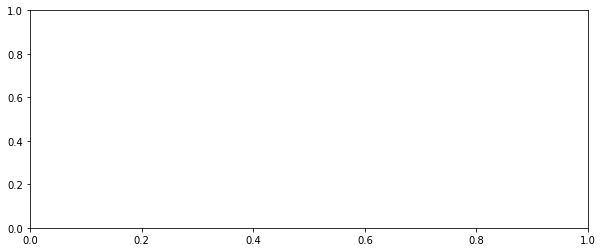

In [74]:
import matplotlib.pyplot as plt
import librosa.display
import torch

audio = librosa.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')[0]

torch_tensor = torch.from_numpy(audio)

# Compute the spectrogram
S2 = torch.stft(torch_tensor, n_fft = 1024, hop_length = 512)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [63]:
S-S2[:,:44]

array([[[ 2.0370870e+00+0.0000000e+00j,  2.5122869e-01+0.0000000e+00j,
          2.3931866e+00+0.0000000e+00j, ...,
         -2.2402477e+00+0.0000000e+00j, -8.1145060e-01+0.0000000e+00j,
          5.6639729e+00+0.0000000e+00j],
        [ 4.7482485e-01-3.8286483e-01j,  1.1315916e+00+1.7960161e-01j,
         -1.3891784e+00-8.6966038e-02j, ...,
          5.2584720e-01-1.0102069e+00j,  1.0543588e-01+3.1778646e+00j,
         -2.7168720e+00+5.9673476e-01j],
        [-9.8687619e-01+1.0376180e-01j, -1.4681230e+00-7.6562285e-01j,
          1.5768284e-01-9.6280795e-01j, ...,
          3.5628891e+00-1.0981359e+00j,  1.6876786e+00-1.2739069e+00j,
          1.4825076e+00-5.8014745e-01j],
        ...,
        [-1.4782557e-03-6.8270956e-06j, -2.7779636e-03+3.5978376e-04j,
          2.5239955e-03+8.0570149e-05j, ...,
          1.1723539e-03-2.3996960e-03j, -2.2878994e-03+1.7997553e-03j,
          2.5324307e-03+9.2782854e-04j],
        [-2.7716216e-03+3.4308050e-06j, -1.4546842e-03+1.8218989e-04j,
    

In [ ]:
/usr/bin/python3 -m pip install ipykernel -U --user --force-reinstall

: 